In [1]:
# For data manipulation
import numpy as np
import pandas as pd
from scipy import stats

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

In [2]:
# Load the dataset into a DataFrame and save in a variable
df0 = pd.read_csv("datasets/listings.csv")

In [3]:
# Display the first 10 rows of the data
df0.head(10)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,40824219,https://www.airbnb.com/rooms/40824219,20251001171547,2025-10-02,city scrape,Room close to Manhattan for FEMALE guests,This cozy spacious room includes a twin size b...,Sunnyside is a safe residental area. <br />The...,https://a0.muscache.com/pictures/hosting/Hosti...,317540555,https://www.airbnb.com/users/show/317540555,Sevil,2019-12-14,NaN,NaN,within a few hours,100%,54%,t,https://a0.muscache.com/im/pictures/user/771f9...,https://a0.muscache.com/im/pictures/user/771f9...,Sunnyside,3.0,3.0,"['email', 'phone']",t,t,Neighborhood highlights,Sunnyside,Queens,40.746980,-73.917630,Private room in townhouse,Private room,1,1.0,1 shared bath,1.0,1.0,"[""Extra pillows and blankets"", ""Dedicated work...",$66.00,30,365,30.0,30.0,365.0,365.0,30.0,365.0,NaN,t,16,46,76,77,2025-10-02,16,2,0,77,0,120,7920.0,2019-12-25,2025-08-06,4.81,4.81,4.88,4.81,4.88,4.94,4.69,NaN,f,3,0,3,0,0.23
1,40833186,https://www.airbnb.com/rooms/40833186,20251001171547,2025-10-02,previous scrape,Soho LES East village private room downtown,NaN,NaN,https://a0.muscache.com/pictures/1f093bbc-936c...,68718914,https://www.airbnb.com/users/show/68718914,Patricio,2016-04-24,NaN,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/0b4f9...,https://a0.muscache.com/im/pictures/user/0b4f9...,NaN,1.0,1.0,['phone'],t,t,NaN,Nolita,Manhattan,40.723140,-73.993230,Private room in serviced apartment,Private room,2,NaN,1 shared bath,1.0,NaN,"[""Hot water"", ""Air conditioning"", ""Wifi"", ""TV""...",NaN,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,0,0,0,0,2025-10-02,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN
2,40837137,https://www.airbnb.com/rooms/40837137,20251001171547,2025-10-02,previous scrape,Sunset Park - Quiet and close to subway!,"Cozy, lovely bedroom with a comfortable full s...",the sunset park of Brooklyn,https://a0.muscache.com/pictures/01c4e91e-4012...,317770098,https://www.airbnb.com/users/show/317770098,Xuan,2019-12-15,"New York, United States",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/2c4b1...,https://a0.muscache.com/im/pictures/user/2c4b1...,Sunset Park,1.0,1.0,"['email', 'phone']",t,t,Neighborhood highlights,Sunset Park,Brooklyn,40.646070,-74.005520,Private room in home,Private room,1,NaN,1 shared bath,NaN,NaN,"[""Smoke alarm"", ""Kitchen"", ""Hair dryer"", ""Wifi...",NaN,30,180,30.0,30.0,180.0,180.0,30.0,180.0,NaN,NaN,0,0,0,0,2025-10-02,1,0,0,0,0,0,NaN,2020-01-19,2020-01-19,5.00,5.00,4.00,5.00,5.00,5.00,5.00,NaN,f,1,0,1,0,0.01
3,40838018,https://www.airbnb.com/rooms/40838018,20251001171547,2025-10-02,previous scrape,C

In [4]:
# Gather basic information about the dataset
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36111 entries, 0 to 36110
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36111 non-null  int64  
 1   listing_url                                   36111 non-null  object 
 2   scrape_id                                     36111 non-null  int64  
 3   last_scraped                                  36111 non-null  object 
 4   source                                        36111 non-null  object 
 5   name                                          36109 non-null  object 
 6   description                                   35153 non-null  object 
 7   neighborhood_overview                         18704 non-null  object 
 8   picture_url                                   36111 non-null  object 
 9   host_id                                       36111 non-null 

In [5]:
# Gather descriptive statistics about the data
df0.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.611100e+04,3.611100e+04,3.611100e+04,34944.000000,34944.000000,36111.000000,36111.000000,36111.000000,21700.000000,30162.000000,21643.000000,36111.000000,3.611100e+04,36099.000000,36099.000000,3.609900e+04,3.609900e+04,36111.000000,3.611100e+04,0.0,36111.000000,36111.000000,36111.000000,36111.000000,36111.000000,36111.000000,36111.000000,36111.000000,36111.000000,36111.000000,2.132800e+04,24923.000000,24913.000000,24922.000000,24909.000000,24917.000000,24907.000000,24907.000000,36111.000000,36111.000000,36111.000000,36111.000000,24923.000000
mean,4.667906e+17,2.025100e+13,1.756195e+08,112.264652,194.007068,40.728253,-73.947350,2.733239,1.192788,1.386016,1.621587,28.610091,6.003553e+04,28.403335,38.708274,2.980906e+05,9.524952e+05,29.459694,6.986474e+05,NaN,8.704578,21.359198,35.372518,162.188724,27.321232,3.983606,0.300573,35.873446,3.537648,46.951594,1.809287e+04,4.722113,4.762297,4.655356,4.833791,4.821406,4.743204,4.634118,67.455152,48.661793,17.957824,0.052532,0.821178
std,5.448721e+17,1.441426e+00,1.945624e+08,592.417347,900.407345,0.056269,0.054995,1.866400,0.548018,0.944931,1.211541,29.166476,1.130082e+07,28.933871,63.420625,2.527220e+07,4.520140e+07,33.684524,3.579217e+07,NaN,12.106346,24.537592,36.932982,147.262625,70.308684,19.468284,1.448168,37.367742,18.974885,85.004647,1.543908e+05,0.463000,0.447870,0.510746,0.384702,0.425933,0.399600,0.504016,215.678813,204.537592,79.015677,0.775728,1.916104
min,2.595000e+03,2.025100e+13,1.678000e+03,1.000000,1.000000,40.500366,-74.251907,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.159416e+07,2.025100e+13,1.795864e+07,1.000000,1.000000,40.688260,-73.983560,2.000000,1.000000,1.000000,1.000000,30.000000,1.500000e+02,30.000000,30.000000,3.000000e+02,3.650000e+02,30.000000,3.650000e+02,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,4.650000,4.710000,4.540000,4.820000,4.820000,4.660000,4.520000,1.000000,0.000000,0.000000,0.000000,0.070000
50%,5.095308e+07,2.025100e+13,8.832602e+07,2.000000,3.000000,40.725960,-73.955000,2.000000,1.000000,1.000000,1.000000,30.000000,3.650000e+02,30.000000,30.000000,3.650000e+02,7.300000e+02,30.000000,3.750000e+02,NaN,0.000000,5.000000,23.000000,150.000000,3.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000e+00,4.860000,4.900000,4.810000,4.950000,4.960000,4.860000,4.760000,2.000000,1.000000,1.000000,0.000000,0.250000
75%,9.747695e+17,2.025100e+13,3.107737e+08,8.000000,12.000000,40.762120,-73.928118,4.000000,1.000000,2.000000,2.000000,30.000000,1.125000e+03,30.000000,30.000000,1.125000e+03,1.125000e+03,30.000000,1.125000e+03,NaN,21.000000,48.000000,75.000000,315.000000,23.000000,1.000000,0.000000,76.000000,1.000000,60.000000,1.887000e+04,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.940000,9.000000,2.000000,2.000000,0.

In [6]:
# Display the size of the dataframe
df0.shape

(36111, 79)

In [7]:
# Cast our data to the appropriate types for the contained values
# convert 'host_since' to datetime
df0['host_since'] = pd.to_datetime(df0['host_since'])
# convert 'price' to numeric
# can't figure out how to get rid of syntax warning but it seems to work regardless
df0['price'] = df0['price'].replace(
    {'\$': '', ',': ''}, regex=True)
df0['price'] = pd.to_numeric(df0['price'])
#df0.info()

<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_303141/2135442077.py:7: SyntaxWarning: invalid escape sequence '\$'
  {'\$': '', ',': ''}, regex=True)


In [8]:
#validate the datetime conversion
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36111 entries, 0 to 36110
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            36111 non-null  int64         
 1   listing_url                                   36111 non-null  object        
 2   scrape_id                                     36111 non-null  int64         
 3   last_scraped                                  36111 non-null  object        
 4   source                                        36111 non-null  object        
 5   name                                          36109 non-null  object        
 6   description                                   35153 non-null  object        
 7   neighborhood_overview                         18704 non-null  object        
 8   picture_url                                   36111 non-null  obje

In [9]:
# For dropping columns if we don't need them for our analysis
df1 = df0.drop(['scrape_id', 'host_location', 'neighbourhood', 'calendar_updated', 'host_thumbnail_url', 'host_picture_url'], axis=1)

In [10]:
# Clean up our missing values
df2 = df1.dropna(axis=0, how='any', subset=['estimated_revenue_l365d', 'price'], inplace=False, ignore_index=False)

In [11]:
#validate the solumn and value dropping conversion
#df2.info()

In [12]:
#pd.set_option('display.max_rows',None)
#df2.isna().sum()

In [13]:
# Create listings dataframe for just whole apartment/houses
df_apartment = df2.query("room_type == 'Entire home/apt'")
#df_apartment.info()

In [14]:
# Create listings dataframe for just rooms in shared apartment/houses
df_room = df2.query("room_type == 'Private room'")
#df_room.info()

In [15]:
# Create dataframes for Brooklyn and Manhattan
df_apartment_brooklyn = df_apartment.query("neighbourhood_group_cleansed == 'Brooklyn'")
df_room_brooklyn = df_room.query("neighbourhood_group_cleansed == 'Brooklyn'")
df_apartment_manhattan = df_apartment.query("neighbourhood_group_cleansed == 'Manhattan'")
df_room_manhattan = df_room.query("neighbourhood_group_cleansed == 'Manhattan'")
#df_apartment_brooklyn.head()
#df_apartment_brooklyn.describe().T
#df_room_manhattan.head()

In [16]:
# Aclculate the IQR for each neighborhood and store it as a new column value
#df_apartment_brooklyn['neighbourhood_cleansed_price_iqr'] = df_apartment_brooklyn['neighbourhood_cleansed'].map(df_apartment_brooklyn.groupby('neighbourhood_cleansed')['price'].agg(stats.iqr))
df_apartment_brooklyn['neighbourhood_cleansed_price_iqr'] = df_apartment_brooklyn['neighbourhood_cleansed'].map(
        df_apartment_brooklyn.groupby('neighbourhood_cleansed')['price'].agg(stats.iqr)
)

aggregated_data = df_apartment_brooklyn.groupby(by='neighbourhood_cleansed').agg(
    min_price=('price', 'min'),
    avg_price=('price', 'mean'),
    max_price=('price', 'max'),
    iqr=('neighbourhood_cleansed_price_iqr', 'first'),
)

print(aggregated_data)
#df_apartment_brooklyn.head()
#df_apartment_brooklyn_grouped.describe

                           min_price   avg_price  max_price     iqr
neighbourhood_cleansed                                             
Bath Beach                      68.0  172.818182      300.0   99.50
Bay Ridge                       60.0  165.000000      703.0   73.00
Bedford-Stuyvesant              60.0  218.311396     1568.0  113.00
Bensonhurst                     82.0  153.300000      352.0   83.00
Bergen Beach                    63.0  210.222222      450.0  140.00
Boerum Hill                    117.0  407.000000     5000.0  192.00
Borough Park                    58.0  182.400000      370.0   83.50
Brighton Beach                  59.0  148.894737      290.0   79.50
Brooklyn Heights               125.0  326.178571     1400.0  171.75
Brownsville                     82.0  191.645161     1077.0  129.00
Bushwick                        59.0  204.584071     4958.0  103.75
Canarsie                        46.0  158.831461     1200.0   87.00
Carroll Gardens                119.0  342.588235

/tmp/ipykernel_303141/1086011016.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apartment_brooklyn['neighbourhood_cleansed_price_iqr'] = df_apartment_brooklyn['neighbourhood_cleansed'].map(


In [123]:
## Commented out so we can figure out how to apply this to each neighborhood 
## based on the values in that neighborhood rather than the IQR for the whole dataset
# Apply IQR filtering for all listings based on price column

# Calculate the first and third quartiles
#Q1 = df_apartment_brooklyn['price'].quantile(0.25)
#Q3 = df_apartment_brooklyn['price'].quantile(0.75)
# Calculate the IQR
#IQR = Q3 - Q1
# Filter out outliers
#df_apartment_brooklyn_filtered = df_apartment_brooklyn[(df_apartment_brooklyn['price'] >= Q1 - 1.5*IQR) & (df_apartment_brooklyn['price'] <= Q3 + 1.5*IQR)]
#print(df_apartment_brooklyn_filtered)

In [58]:
## Useful for testing with fewer columns. Code works if we want to slim the dataset once we know columns of interest
# Trim the brooklyn data columns
#df_apartment_brooklyn_cleaned = df_apartment_brooklyn.loc[:, ['host_id', 'neighbourhood_cleansed', 'price', 'estimated_revenue_l365d', 'estimated_occupancy_l365d', 'accommodates', 'amenities']]
#df_room_brooklyn_cleaned = df_room_brooklyn.loc[:, ['host_id', 'neighbourhood_cleansed', 'price', 'estimated_revenue_l365d', 'estimated_occupancy_l365d', 'accommodates', 'amenities']]
#df_apartment_brooklyn_cleaned.head()

<Axes: title={'center': 'price'}, xlabel='neighbourhood_cleansed'>

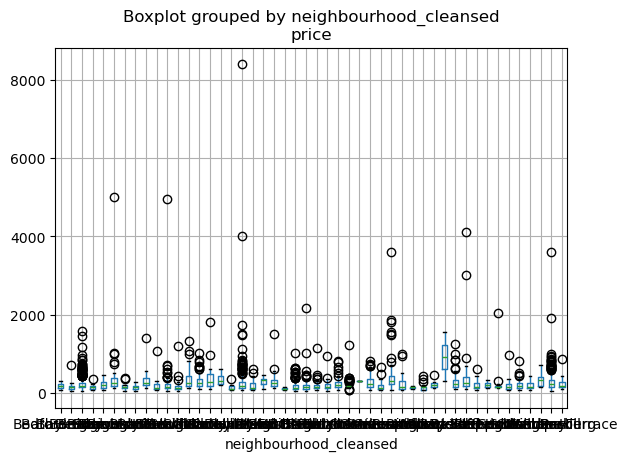

In [18]:
# Exploratory Data Analysis for each feature
#sns.boxplot(
#    x="neighbourhood_cleansed", y="price", data=df_room_brooklyn_cleaned.query("neighbourhood_cleansed == 'Greenpoint'")
#)
#plt.show()
df_apartment_brooklyn.boxplot(column='price', by='neighbourhood_cleansed') 
